## Importations

In [1]:
# Run Keras on CPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = " "         # -1 if CPU

In [2]:
# Importations
import sys
sys.path.append('utils')

from configtf2 import *
import CPutils_tf2
import feature_extraction_tf2

In [3]:
# Check GPUs
tf.test.gpu_device_name()

''

In [4]:
# Check version
tf.__version__

'2.4.1'

## Data

In [5]:
# Load original dataset
BASE_PATH = os.path.join('..', 'data')
Data, labels = cload(os.path.join(BASE_PATH, 'OR_data.lzma'), compression='lzma')

In [7]:
# Load training/validation data (already augmented training set)
Xtrain, ytrain, Xval, yval = cload(os.path.join(BASE_PATH, 'train_val_expanded.lzma'), 
                                     compression='lzma')

In [11]:
# Load test data (new set)
X_test, y_test = cload(os.path.join(BASE_PATH, 'test_set', 'test_set.lzma'), 
                      compression='lzma')

In [12]:
# Load test data (new set 2)
X_test2, y_test2 = cload(os.path.join(BASE_PATH, 'new_test_set', 'new_test_set.lzma'), 
                         compression='lzma')

In [9]:
Xtrain.shape, ytrain.shape

((21088, 31, 38, 1), (21088,))

In [9]:
Xval.shape, yval.shape

((4395, 31, 38, 1), (4395,))

In [13]:
X_test.shape, y_test.shape

((4663, 31, 38), (4663,))

In [14]:
X_test2.shape, y_test2.shape

((7713, 31, 38), (7713,))

## CNNet

In [15]:
# Import model and initialize a testing model
from nets_tf2.firenet import FireNet
dims = (Xtrain.shape[2], Xtrain.shape[1], 1)
model = FireNet.build_model(width=dims[0], height=dims[1], depth=dims[2], classes=2)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 31, 38, 32)        73        
_________________________________________________________________
activation (Activation)      (None, 31, 38, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 38, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 19, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 19, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 15, 19, 64)        2400      
_________________________________________________________________
activation_1 (Activation)    (None, 15, 19, 64)        0

## Load pretrained model

In [16]:
OUTPATH = os.path.join('..', 'pretrained_models')
model.load_weights(os.path.join(OUTPATH, 'M2.h5'))

## Evaluation

In [17]:
# Importations for evaluation
from sklearn.metrics import (mean_squared_error, roc_auc_score, auc, 
                             confusion_matrix, accuracy_score, classification_report,
                             precision_score, recall_score, f1_score, cohen_kappa_score)
from tensorflow.keras.utils import to_categorical

### Validation dataset 

In [14]:
# Predict over the original images
# Get Test truth and hat
y_hat = model.predict(Xval)
ytest = yval

# Evaluation
print("Test accuracy [%]:", np.round(accuracy_score(y_true=ytest, y_pred=y_hat.argmax(1)) * 100, 2))
print("Precision Score:", np.round(precision_score(y_true=ytest, y_pred=y_hat.argmax(1)),3))
print("Recall score:", np.round(recall_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("F1 score:", np.round(f1_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("Cohen Kappa score:", np.round(cohen_kappa_score(ytest, y_hat.argmax(1)),3))
print("ROC AUC score:", np.round(roc_auc_score(y_true=ytest, y_score=y_hat[:,1]), 3))
tn, fp, fn, tp = confusion_matrix(ytest, y_hat.argmax(1)).ravel()
print("Specificity:", tn / (tn+fp))
print("Sensitivity:", tp / (tp+fn))
print(confusion_matrix(ytest, y_hat.argmax(1)))

Test accuracy [%]: 90.69
Precision Score: 0.693
Recall score: 0.953
F1 score: 0.803
Cohen Kappa score: 0.744
ROC AUC score: 0.976
Specificity: 0.8955139125496877
Sensitivity: 0.9530355097365406
[[3154  368]
 [  41  832]]


In [15]:
# Report
print(classification_report(ytest, 
                            y_hat.argmax(1),))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3522
           1       0.69      0.95      0.80       873

    accuracy                           0.91      4395
   macro avg       0.84      0.92      0.87      4395
weighted avg       0.93      0.91      0.91      4395



### Whole dataset

In [16]:
# Predict over the original images (no augmentation by Smote)
# Get Test truth and hat
y_hat = model.predict(np.expand_dims(Data, -1))
ytest = labels

# Evaluation
print("Test accuracy [%]:", np.round(accuracy_score(y_true=ytest, y_pred=y_hat.argmax(1)) * 100, 2))
print("Precision Score:", np.round(precision_score(y_true=ytest, y_pred=y_hat.argmax(1)),3))
print("Recall score:", np.round(recall_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("F1 score:", np.round(f1_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("Cohen Kappa score:", np.round(cohen_kappa_score(ytest, y_hat.argmax(1)),3))
print("ROC AUC score:", np.round(roc_auc_score(y_true=ytest, y_score=y_hat[:,1]), 3))
tn, fp, fn, tp = confusion_matrix(ytest, y_hat.argmax(1)).ravel()
print("Specificity:", tn / (tn+fp))
print("Sensitivity:", tp / (tp+fn))
print(confusion_matrix(ytest, y_hat.argmax(1)))

Test accuracy [%]: 92.3
Precision Score: 0.738
Recall score: 0.955
F1 score: 0.832
Cohen Kappa score: 0.784
ROC AUC score: 0.98
Specificity: 0.9150721957464969
Sensitivity: 0.9548295454545455
[[12865  1194]
 [  159  3361]]


In [17]:
# Report
print(classification_report(ytest, 
                            y_hat.argmax(1),))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     14059
           1       0.74      0.95      0.83      3520

    accuracy                           0.92     17579
   macro avg       0.86      0.93      0.89     17579
weighted avg       0.94      0.92      0.93     17579



### Independent testing dataset 
4,663 new and independent images

In [18]:
# Predict over the independent testing set 
# Get Test truth and hat
y_hat = model.predict(np.expand_dims(X_test, -1))
ytest = y_test

# Evaluation
print("Test accuracy [%]:", np.round(accuracy_score(y_true=ytest, y_pred=y_hat.argmax(1)) * 100, 2))
print("Precision Score:", np.round(precision_score(y_true=ytest, y_pred=y_hat.argmax(1)),3))
print("Recall score:", np.round(recall_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("F1 score:", np.round(f1_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("Cohen Kappa score:", np.round(cohen_kappa_score(ytest, y_hat.argmax(1)),3))
print("ROC AUC score:", np.round(roc_auc_score(y_true=ytest, y_score=y_hat[:,1]), 3))
tn, fp, fn, tp = confusion_matrix(ytest, y_hat.argmax(1)).ravel()
print("Specificity:", tn / (tn+fp))
print("Sensitivity:", tp / (tp+fn))
print(confusion_matrix(ytest, y_hat.argmax(1)))

Test accuracy [%]: 89.49
Precision Score: 0.681
Recall score: 0.808
F1 score: 0.739
Cohen Kappa score: 0.674
ROC AUC score: 0.888
Specificity: 0.9145636172450052
Sensitivity: 0.8079161816065192
[[3479  325]
 [ 165  694]]


In [19]:
# Report
print(classification_report(ytest, 
                            y_hat.argmax(1),))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3804
           1       0.68      0.81      0.74       859

    accuracy                           0.89      4663
   macro avg       0.82      0.86      0.84      4663
weighted avg       0.90      0.89      0.90      4663



### Independent testing dataset 2
7,713 new and independent images

In [19]:
# Predict over the independent testing set 
# Get Test truth and hat
y_hat = model.predict(np.expand_dims(X_test2, -1))
ytest = y_test2

# Evaluation
print("Test accuracy [%]:", np.round(accuracy_score(y_true=ytest, y_pred=y_hat.argmax(1)) * 100, 2))
print("Precision Score:", np.round(precision_score(y_true=ytest, y_pred=y_hat.argmax(1)),3))
print("Recall score:", np.round(recall_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("F1 score:", np.round(f1_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("Cohen Kappa score:", np.round(cohen_kappa_score(ytest, y_hat.argmax(1)),3))
print("ROC AUC score:", np.round(roc_auc_score(y_true=ytest, y_score=y_hat[:,1]), 3))
tn, fp, fn, tp = confusion_matrix(ytest, y_hat.argmax(1)).ravel()
print("Specificity:", tn / (tn+fp))
print("Sensitivity:", tp / (tp+fn))
print(confusion_matrix(ytest, y_hat.argmax(1)))

Test accuracy [%]: 91.78
Precision Score: 0.687
Recall score: 0.991
F1 score: 0.811
Cohen Kappa score: 0.761
ROC AUC score: 0.954
Specificity: 0.9020504731861199
Sensitivity: 0.9905316824471959
[[5719  621]
 [  13 1360]]


In [20]:
# Report
print(classification_report(ytest, 
                            y_hat.argmax(1),))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      6340
           1       0.69      0.99      0.81      1373

    accuracy                           0.92      7713
   macro avg       0.84      0.95      0.88      7713
weighted avg       0.94      0.92      0.92      7713



# Load special sample set
## Assumption
The criteria used for selecting the landscapes are based on the assumption that the most likely source of ignition are, indeed, cities (human presence). Therefore, all the selected landscapes for evaluation and discussion are located in areas where $lcV8 > 0$, the land cover indicating the presence of urban zones.

### High risk 
- Rule: $lcV3 \geq >=0.35$ AND $lcV8 \geq >=0.1 $
- IDs: 10150, 11212, 12517, 14675, 15484, 9538, 13075, 15802, 5490, 15424, 1669, 6300, 13259
- Description: Homogeneous landscapes characterized by agricultural land and a high population density 

### Medium risk
- Rule: $lcV8 < 0.1$ AND $lcV8 > 0$ AND $lcV1 \geq 0.15$ AND $lcV2 \geq 0.15$ AND $lcV3 \geq 0.05$ AND $lcV4 \geq 0.15$ AND $lcV5 \geq 0.15$
- IDs: 1471, 13549, 15101, 4762, 9732, 15982, 4662, 8649, 14025, 11807, 3260
- Description: Heterogeneous landscapes characterized by an equal proportion of the most common land cover types and a low population density.

### Low risk
- Rule: $lcV8 < 0.1$ AND $lcV8 > 0$ AND $lcV2 \geq 0.4$ AND $lcV3 < 0.1$ AND $lcV3 > 0$ AND $Lat \geq -38.146$ 
- IDs: 338, 12499, 8218, 14061, 13666, 7588, 11120, 11429, 15152, 8958, 2957, 16020
- Description: Homogeneous landscapes of native forest and low population density

In [20]:
# Load sample set
VAL_PATH = os.path.join('..', 'data', 'sample_set')
Xval, yval = cload(os.path.join(VAL_PATH, 'validation_set.lzma'), compression='lzma')
Xval = Xval.reshape((36,31,38,1)) / 255.

In [21]:
# Predict over the sample images
# Get Test truth and hat
y_true = yval
y_hat = model.predict(Xval)

# Importations for evaluation
ytest = y_true

# Evaluation
print("Test accuracy [%]:", np.round(accuracy_score(y_true=ytest, y_pred=y_hat.argmax(1)) * 100, 2))
print("Precision Score:", np.round(precision_score(y_true=ytest, y_pred=y_hat.argmax(1)),3))
print("Recall score:", np.round(recall_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("F1 score:", np.round(f1_score(y_true=ytest, y_pred=y_hat.argmax(1)), 3))
print("Cohen Kappa score:", np.round(cohen_kappa_score(ytest, y_hat.argmax(1)),3))
print("ROC AUC score:", np.round(roc_auc_score(y_true=ytest, y_score=y_hat[:,1]), 3))
tn, fp, fn, tp = confusion_matrix(ytest, y_hat.argmax(1)).ravel()
print("Specificity:", tn / (tn+fp))
print("Sensitivity:", tp / (tp+fn))
print(confusion_matrix(ytest, y_hat.argmax(1)))

Test accuracy [%]: 97.22
Precision Score: 0.95
Recall score: 1.0
F1 score: 0.974
Cohen Kappa score: 0.944
ROC AUC score: 0.991
Specificity: 0.9411764705882353
Sensitivity: 1.0
[[16  1]
 [ 0 19]]


In [22]:
# Report
print(classification_report(y_true, 
                            y_hat.argmax(1),))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.95      1.00      0.97        19

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



<Figure size 432x288 with 0 Axes>

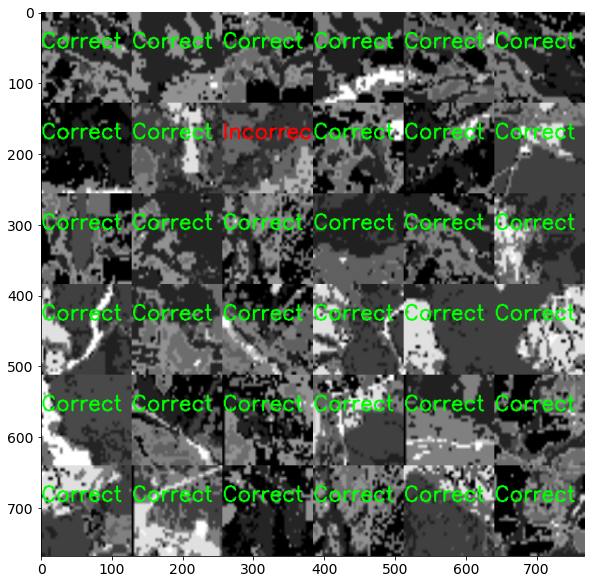

In [23]:
# Montage
CPutils_tf2.plt_style(figsize=(10,10))
_ = CPutils_tf2.predicted_collage(images=Xval, 
                                  rescale=255.,
                                  model=model,
                                  sampleSize=-1,
                                  collagesize=(6,6),
                                  labels=to_categorical(yval),
                                  imagesize=(128,128), 
                                  show=False)

plt.imsave(os.path.join(VAL_PATH, 'sample_set_predictions.png'), cv2.cvtColor(_[0], cv2.COLOR_BGR2RGB))